# Comparison of different cummulative alphas over exchanges and high-low strategies

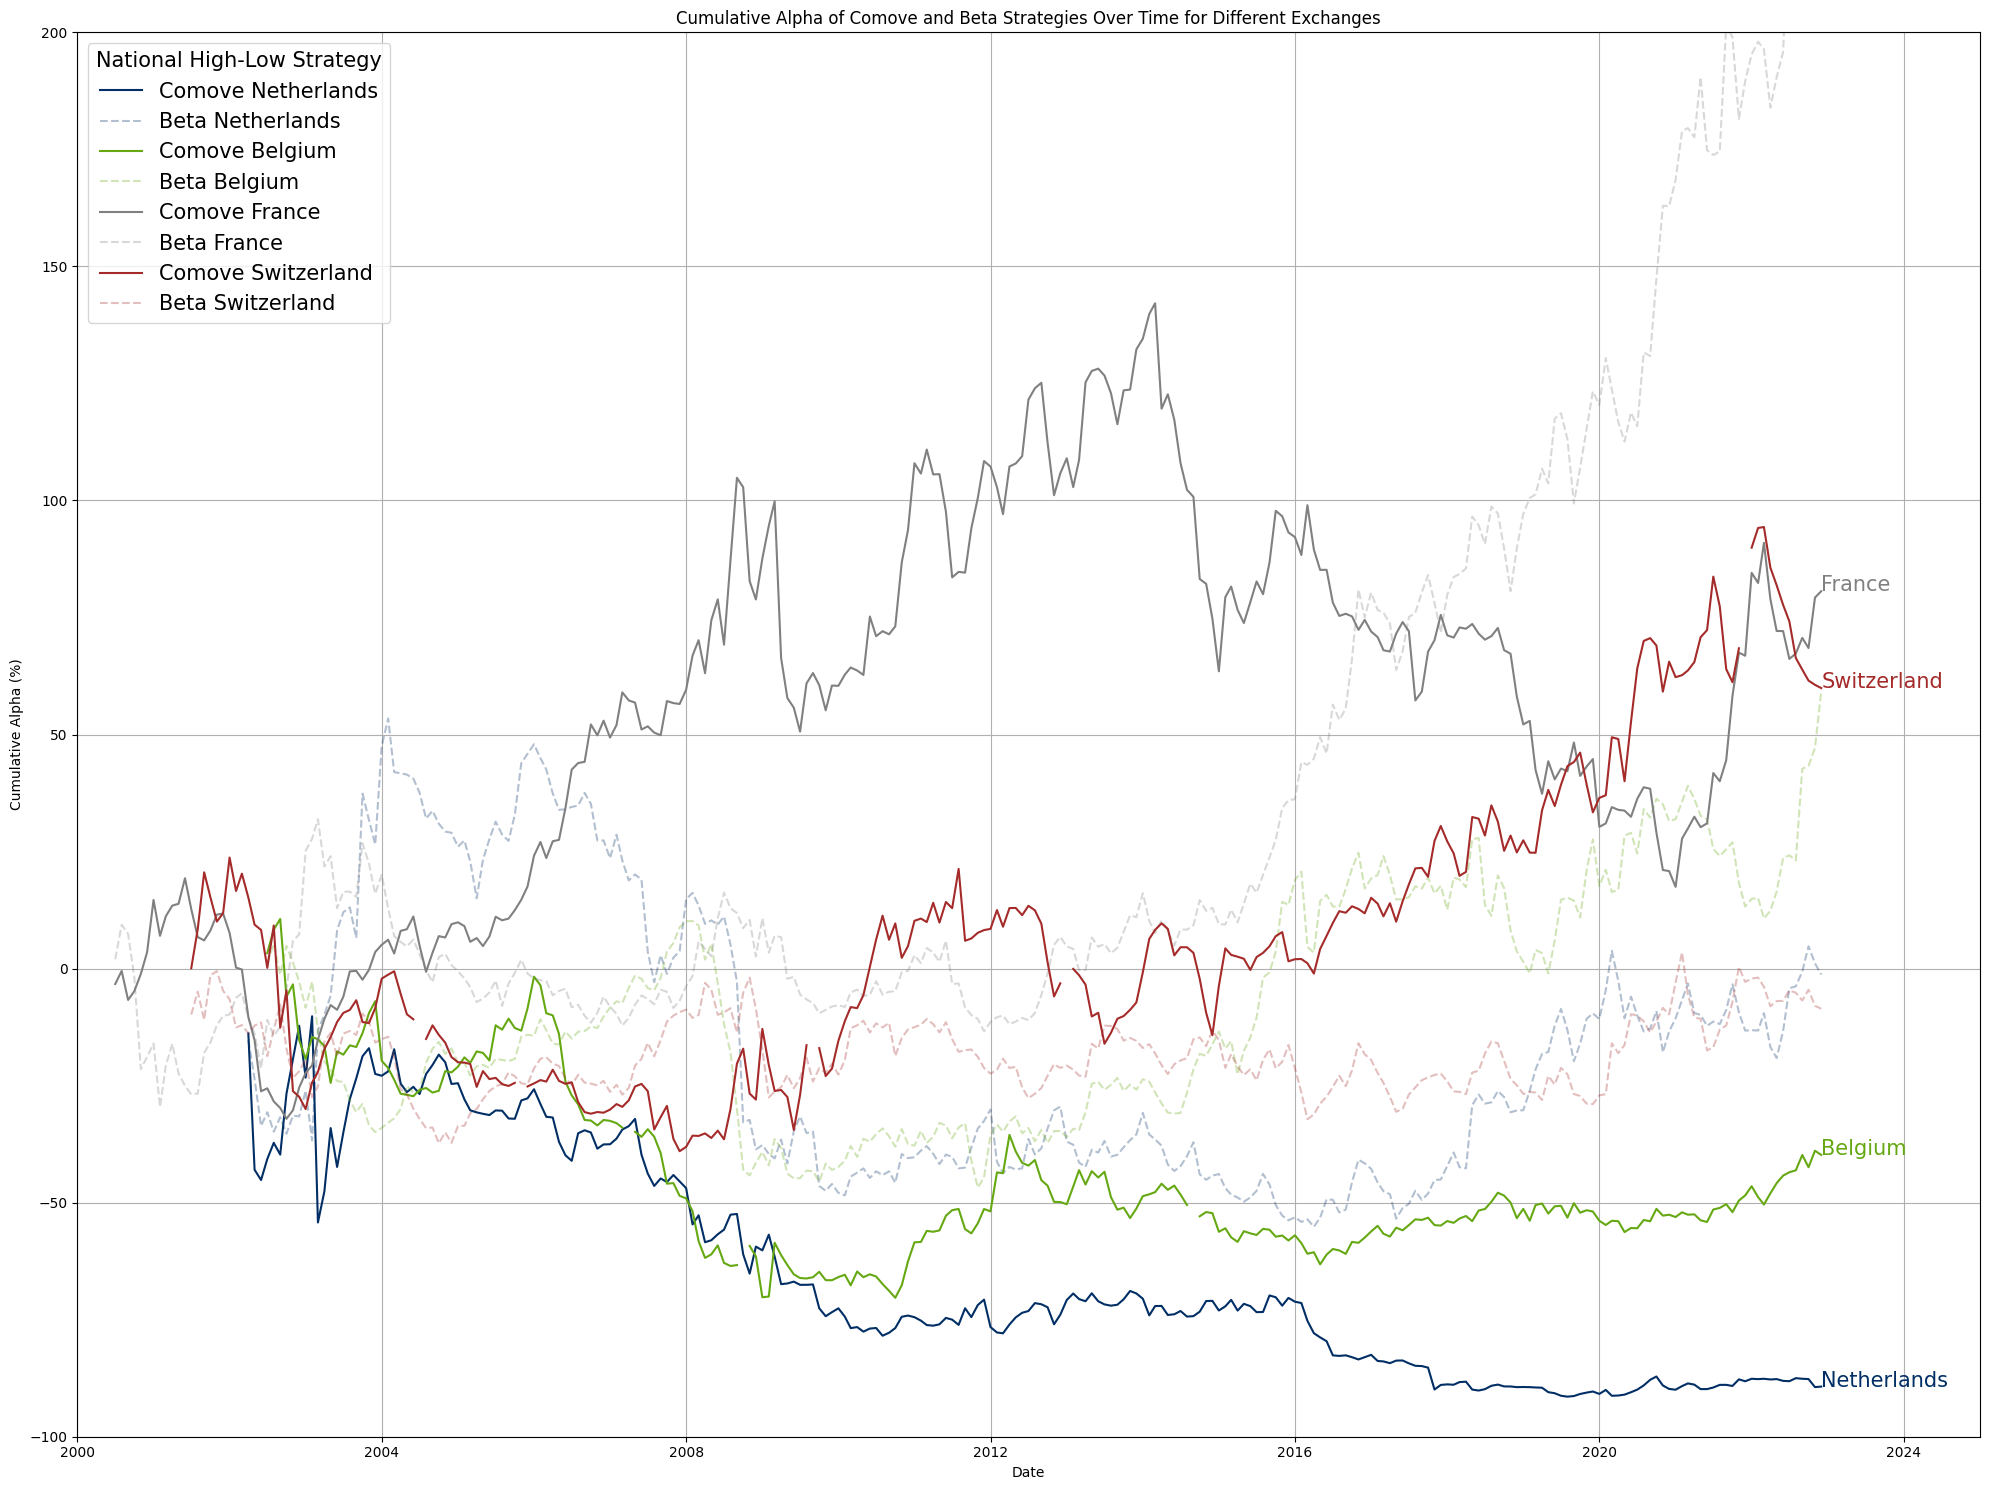

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the file paths and their corresponding countries
files = {
    "CumAlpha_AEX.xlsx": "Netherlands",
    "CumAlpha_BEL20.xlsx": "Belgium",
    "CumAlpha_CAC40.xlsx": "France",
    "CumAlpha_SMI.xlsx": "Switzerland"
}

# Function to convert MMYYYY to datetime
def convert_mmyyyy_to_datetime(mmyyyy):
    if isinstance(mmyyyy, pd.Timestamp):
        return mmyyyy
    mmyyyy_str = str(mmyyyy)
    if len(mmyyyy_str) == 6:
        return pd.to_datetime(mmyyyy_str, format='%m%Y')
    elif len(mmyyyy_str) == 8 and mmyyyy_str[4] == '-':
        return pd.to_datetime(mmyyyy_str)
    else:
        raise ValueError(f"Unexpected date format: {mmyyyy_str}")

# Read all data into a dictionary
data = {}
for file, country in files.items():
    df = pd.read_excel(file)
    # Convert MMYYYY column to datetime
    df['Date'] = df['MMYYYY'].apply(convert_mmyyyy_to_datetime)
    # Calculate cumulative returns
    df['CumAlpha_Comove'] = (1 + df['Estimated Alpha Comove']).cumprod() - 1
    df['CumAlpha_Beta'] = (1 + df['Estimated Alpha Beta']).cumprod() - 1
    # Convert to percentage
    df['CumAlpha_Comove'] = df['CumAlpha_Comove'] * 100
    df['CumAlpha_Beta'] = df['CumAlpha_Beta'] * 100
    data[country] = df

# Concatenate all data to find the common date range
all_dates = pd.concat([df['Date'] for df in data.values()]).drop_duplicates().sort_values()
common_dates = pd.DataFrame(all_dates, columns=['Date'])

# Define colors for each country
colors = {
    "Netherlands": "#002E65",
    "Belgium": "#65A812",
    "France": "grey",
    "Germany": "#003C43",
    "Sweden": "#2C3333",
    "Switzerland": "brown"
}

# Initialize a plot
plt.figure(figsize=(20, 15))

# Loop through each DataFrame and plot the data
for country, df in data.items():
    # Merge with the common dates to align all dataframes
    df = common_dates.merge(df, on='Date', how='left')

    # Plot the comove strategy in full line
    plt.plot(df['Date'], df['CumAlpha_Comove'], label=f'Comove {country}', color=colors[country], linewidth=1.5)

    # Plot the beta strategy in dashed line
    plt.plot(df['Date'], df['CumAlpha_Beta'], linestyle='--', label=f'Beta {country}', color=colors[country], alpha=0.3)

    # Annotate the last point of the comove line with the country name
    plt.text(df['Date'].iloc[-1], df['CumAlpha_Comove'].iloc[-1], country, fontsize=15, color=colors[country])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Alpha (%)')
plt.title('Cumulative Alpha of Comove and Beta Strategies Over Time for Different Exchanges')
plt.legend(title='National High-Low Strategy', title_fontsize=15, fontsize=15)
plt.grid(True)
plt.ylim(-100, 200)  # Set y-axis limit
plt.xlim(datetime(2000, 1, 1), datetime(2025, 1, 1))  # Set x-axis limit
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_alpha_plot.png')

# Show the plot
plt.show()